In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from matplotlib.colors import ListedColormap

In [7]:
data = load_iris()
X, y = data.data[:,:2], data.target

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [12]:
k = 5
classifier = KNeighborsClassifier(n_neighbors = k)
classifier.fit(X_train, y_train)


KNeighborsClassifier()

In [13]:
y_pred = classifier.predict(X_test)

In [14]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.74


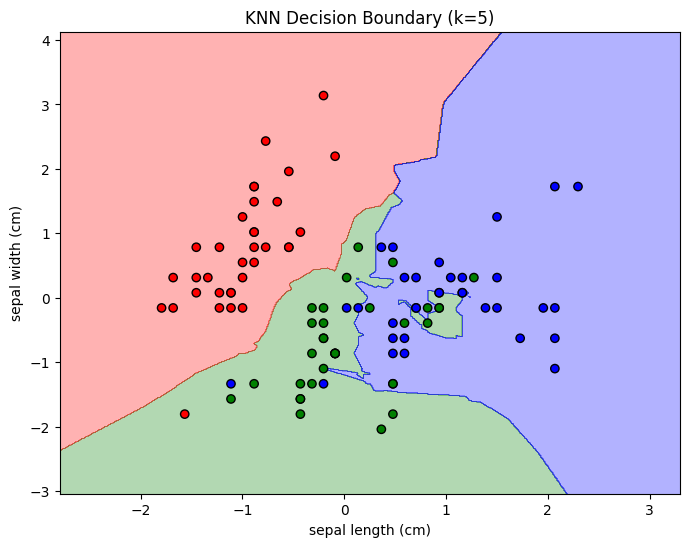

In [20]:
x_min, x_max=X_train[:, 0].min()-1, X_train[:, 0].max()+1
y_min, y_max=X_train[:, 1].min()-1, X_train[:, 1].max()+1

xx, yy=np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

z=classifier.predict(np.c_[xx.ravel(), yy.ravel()])

z=z.reshape(xx.shape)

plt.figure(figsize=(8,6))
plt.contourf(xx, yy, z, alpha=0.3, cmap=ListedColormap(['red', 'green', 'blue']))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=ListedColormap(['red', 'green', 'blue']),
edgecolors='k')

plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
plt.title(f'KNN Decision Boundary (k={k})')
plt.show()